In [1]:
import pandas as pd
from scipy.stats import ttest_ind

csv_file = "classified_gc_content.csv"  # Replace with your CSV file path
df = pd.read_csv(csv_file)

In [7]:
# Ensure the necessary columns are present
if "Region Type" in df.columns and "GC Content (%)" in df.columns:
    # Calculate statistics
    stats = df.groupby("Region Type")["GC Content (%)"].agg(
        Mean="mean", Variance="var", Std_Dev="std"
    )
    print(stats)
else:
    print("Error: The CSV file must contain 'Region Type' and 'GC Content (%)' columns.")

                          Mean   Variance   Std_Dev
Region Type                                        
Coding (GC-rich)     36.426667  20.405233  4.517215
Neutral (Mixed)      32.060000        NaN       NaN
Noncoding (GC-poor)  28.478333   1.167897  1.080693


In [6]:
if "Region Type" in df.columns and "GC Content (%)" in df.columns:
    # Split data
    coding = df[df["Region Type"] == "Coding (GC-rich)"]["GC Content (%)"]
    noncoding = df[df["Region Type"] == "Noncoding (GC-poor)"]["GC Content (%)"]

    # Perform t-test
    t_stat, p_value = ttest_ind(coding, noncoding, equal_var=False)
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 3.004961735481902, P-value: 0.08892708924021188


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
gc_content_normalized = scaler.fit_transform(df[["GC Content (%)"]])



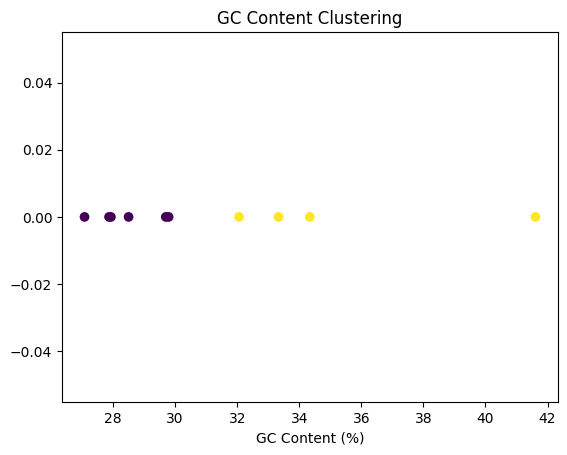

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=0)
df["Cluster"] = kmeans.fit_predict(gc_content_normalized)

# Visualize clusters
plt.scatter(df["GC Content (%)"], [0]*len(df), c=df["Cluster"], cmap="viridis")
plt.xlabel("GC Content (%)")
plt.title("GC Content Clustering")
plt.show()


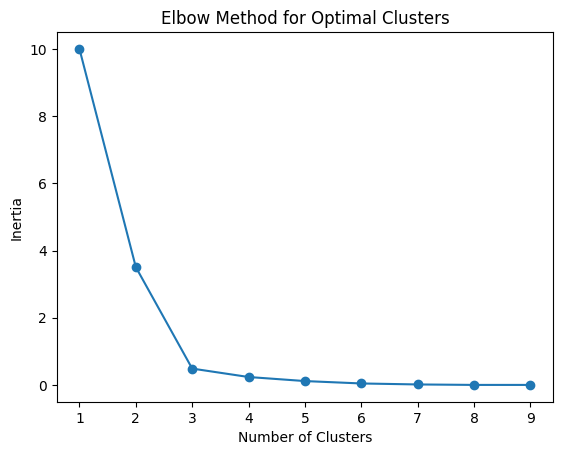

In [5]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(gc_content_normalized)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal Clusters")
plt.show()
